### Code to optimize a curve fit for logit(P_c) using b*log(1+exp(a-t))+c, uses least squares on SEER data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import scipy.special as scipy

In [2]:
df = pd.read_csv('/homes/fed1/Survival_Franny/formatted_net_SEER_survival_by_cause_age_sex_year_GBD_causes.csv')

In [3]:
df['t'] = df['interval']+1

df = df[df.year==0]
df = df[df.sex==3]
df = df[df.age_name=="All Ages"]

df['P_c'] = 1 - df['net_survival']

# Calculate the conditioned or single year probability of death
for cancer in df.cause_name.unique():
    index_1 = (df.cause_name==cancer)
    df.loc[(index_1)&(df.t>1), 'P_c']=1-df.net_survival[index_1].values[1:]/df.net_survival[index_1].values[:-1]

In [4]:
df = df.dropna()
df = df[df['P_c']!=0]
df['logit_P_c'] = scipy.logit(df['P_c'])

In [5]:
# define the functional form to fit
def function(x,t):
    return x[1]*np.log(1 + np.exp(-(t-x[0])))+x[2]

def model(x, t, y):
    return function(x,t)-y

In [6]:
# starting values
x_0 = np.array([1.0,1.0,1.0])

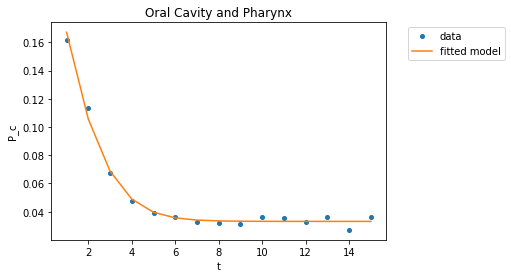

                cause_name         a         b         c
0  Oral Cavity and Pharynx  4.031271  0.574437 -3.373683


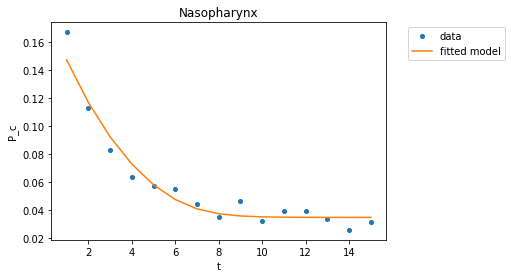

    cause_name         a         b         c
0  Nasopharynx  6.876583  0.267858 -3.330799


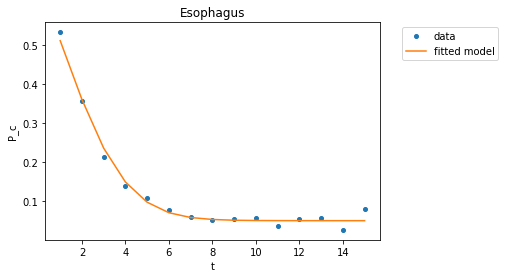

  cause_name         a         b         c
0  Esophagus  5.764465  0.627466 -2.949353


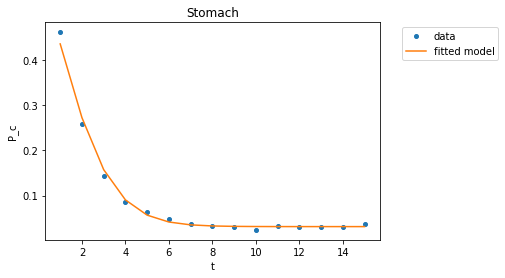

  cause_name         a         b        c
0    Stomach  5.275841  0.741492 -3.43761


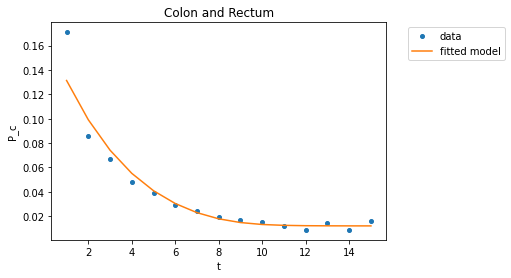

         cause_name         a         b         c
0  Colon and Rectum  8.926807  0.318242 -4.411596


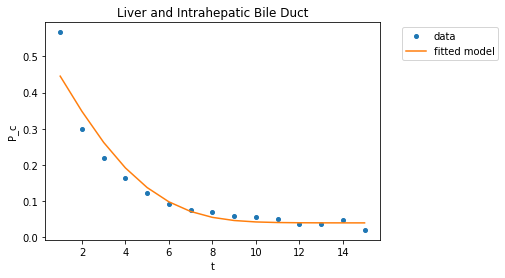

                         cause_name         a         b         c
0  Liver and Intrahepatic Bile Duct  8.288451  0.409316 -3.202851


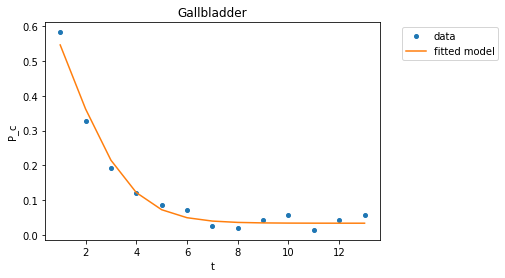

    cause_name         a         b        c
0  Gallbladder  5.651321  0.764513 -3.37708


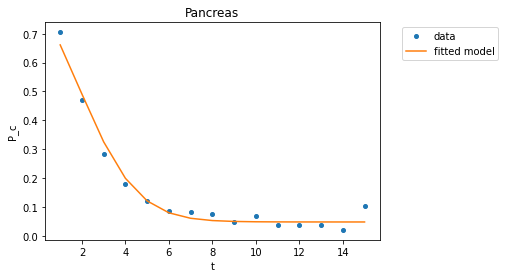

  cause_name         a         b         c
0   Pancreas  6.139785  0.712413 -2.997631


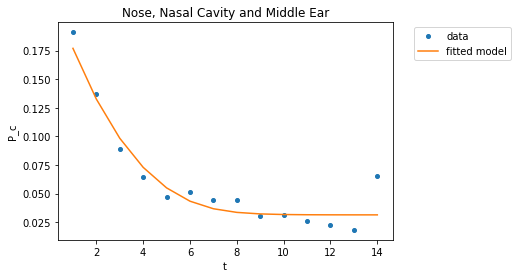

                          cause_name        a        b         c
0  Nose, Nasal Cavity and Middle Ear  6.50194  0.34377 -3.430096


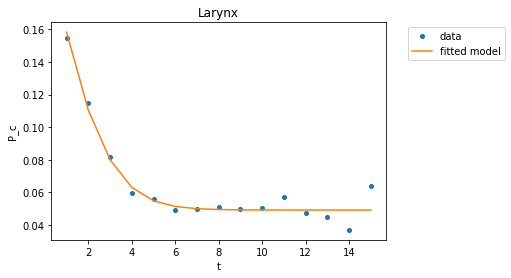

  cause_name         a         b         c
0     Larynx  3.741141  0.459949 -2.960778


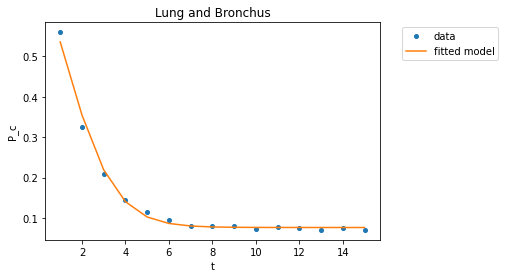

          cause_name         a         b         c
0  Lung and Bronchus  4.314071  0.786404 -2.489746


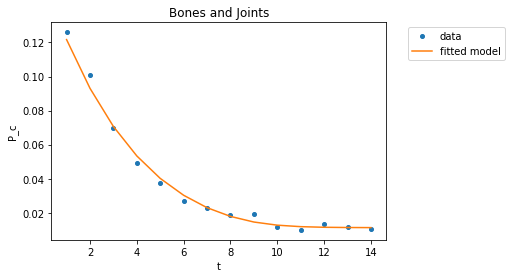

         cause_name         a         b         c
0  Bones and Joints  9.327603  0.300218 -4.476718


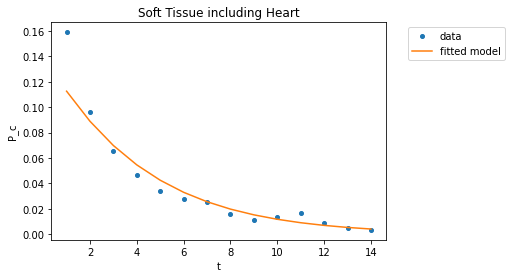

                    cause_name          a         b          c
0  Soft Tissue including Heart  52.926869  0.262283 -15.683826


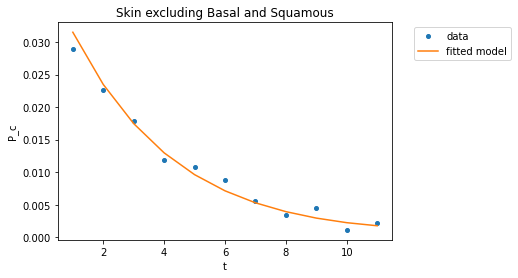

                          cause_name          a         b         c
0  Skin excluding Basal and Squamous  11.840978  0.302279 -6.702657


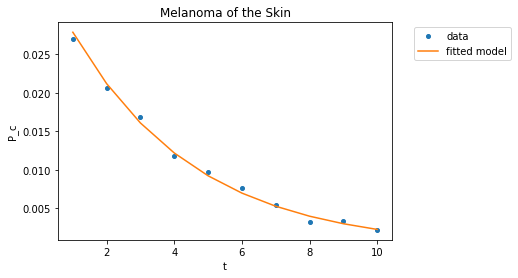

             cause_name          a         b          c
0  Melanoma of the Skin  78.731237  0.280506 -25.357412


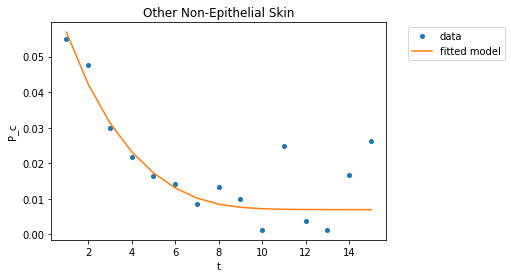

                  cause_name         a         b         c
0  Other Non-Epithelial Skin  7.901521  0.311795 -4.961017


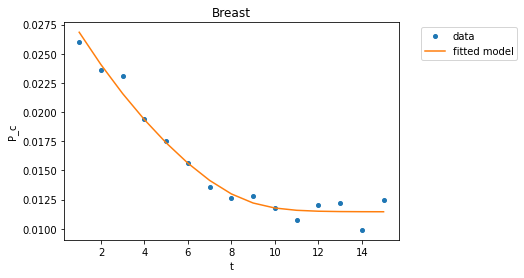

  cause_name         a         b         c
0     Breast  8.746104  0.111943 -4.457796


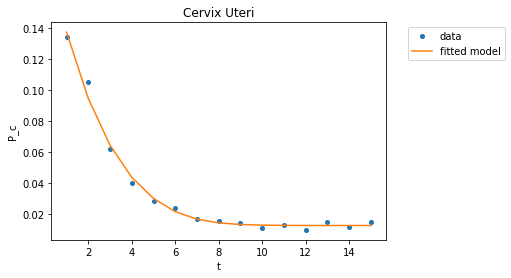

     cause_name         a         b         c
0  Cervix Uteri  6.971553  0.422925 -4.364101


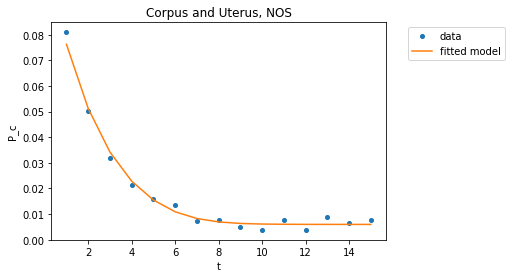

               cause_name         a         b         c
0  Corpus and Uterus, NOS  7.153558  0.426078 -5.116583


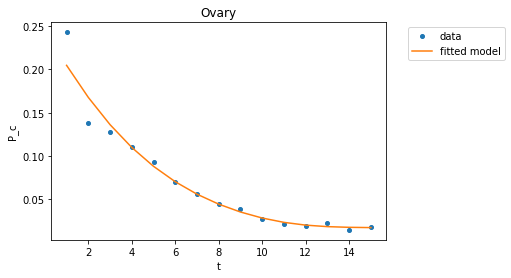

  cause_name          a         b         c
0      Ovary  11.958017  0.244756 -4.038601


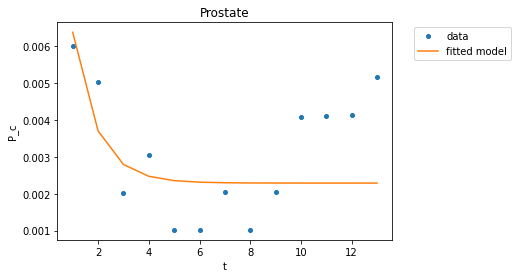

  cause_name         a         b         c
0   Prostate  1.261091  1.238105 -6.077656


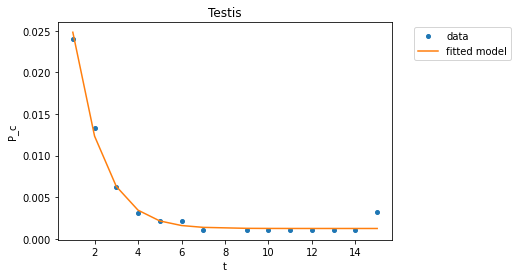

  cause_name       a         b         c
0     Testis  5.1282  0.731963 -6.703719


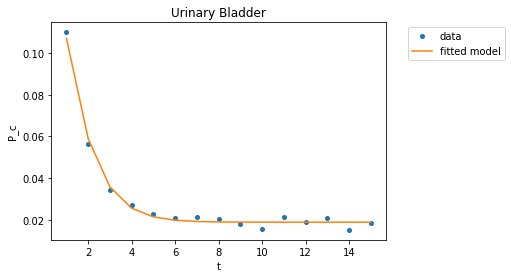

        cause_name        a         b         c
0  Urinary Bladder  3.32084  0.757416 -3.949472


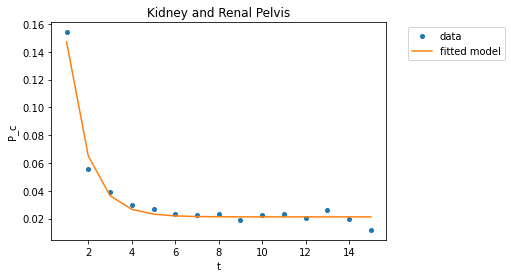

                cause_name         a         b         c
0  Kidney and Renal Pelvis  2.387996  1.288105 -3.832978


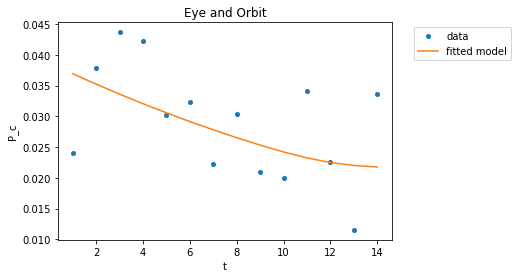

      cause_name          a         b         c
0  Eye and Orbit  12.298315  0.048868 -3.813383


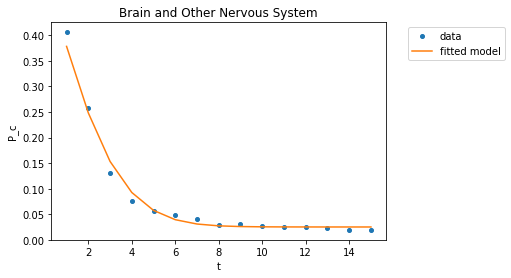

                       cause_name         a         b         c
0  Brain and Other Nervous System  6.117908  0.617729 -3.661802


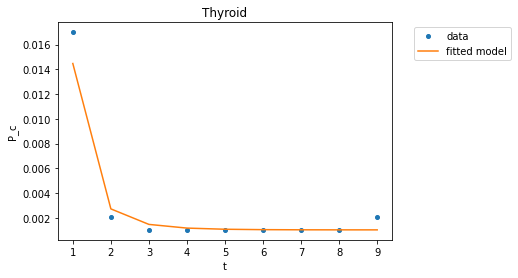

  cause_name         a             b        c
0    Thyroid -8.162622  25399.157052 -6.88487


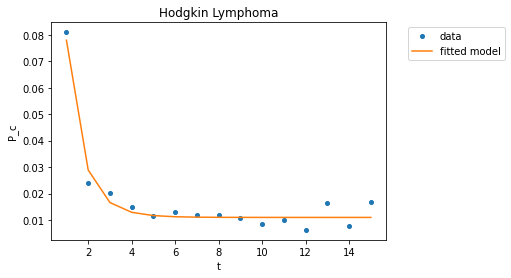

         cause_name         a         b         c
0  Hodgkin Lymphoma  1.492149  2.095731 -4.501473


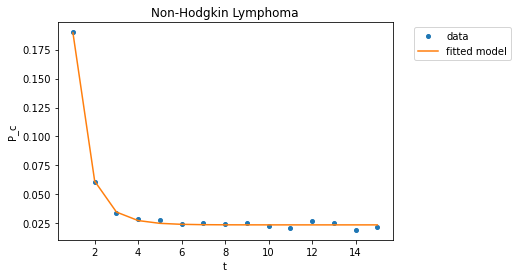

             cause_name        a         b         c
0  Non-Hodgkin Lymphoma  0.76587  3.889175 -3.720703


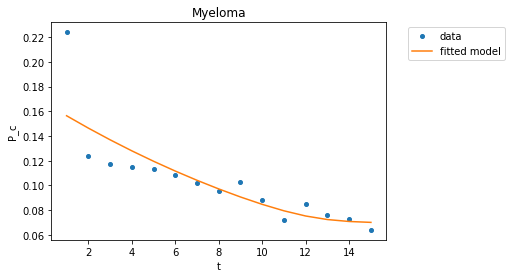

  cause_name          a        b         c
0    Myeloma  12.656171  0.07778 -2.591638


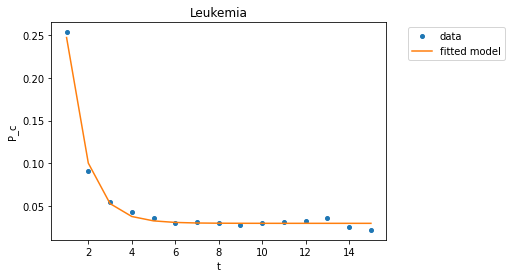

  cause_name         a         b         c
0   Leukemia  2.169122  1.638252 -3.474119


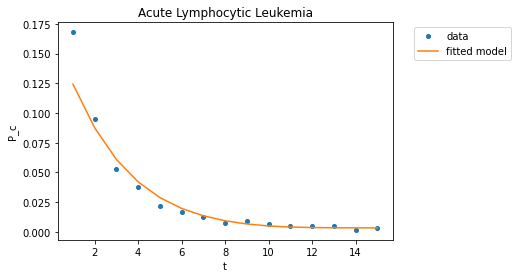

                   cause_name          a        b         c
0  Acute Lymphocytic Leukemia  10.599583  0.39187 -5.714212


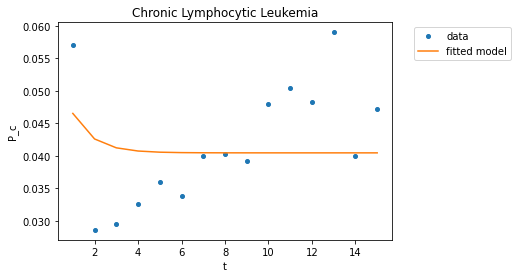

                     cause_name         a            b         c
0  Chronic Lymphocytic Leukemia -8.155879  1381.702974 -3.165721


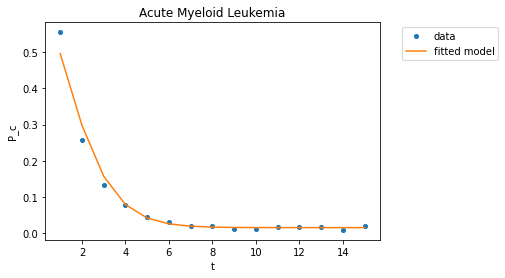

               cause_name         a         b         c
0  Acute Myeloid Leukemia  5.845505  0.851347 -4.147956


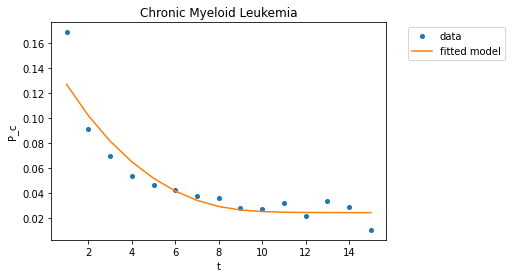

                 cause_name         a         b         c
0  Chronic Myeloid Leukemia  8.129888  0.246933 -3.686652


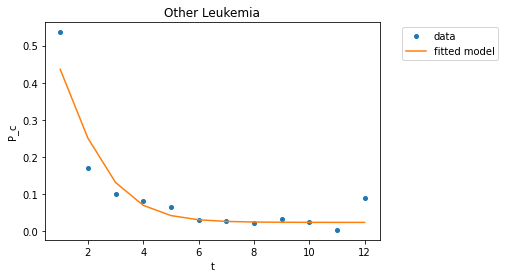

       cause_name         a         b         c
0  Other Leukemia  4.969472  0.863509 -3.700143


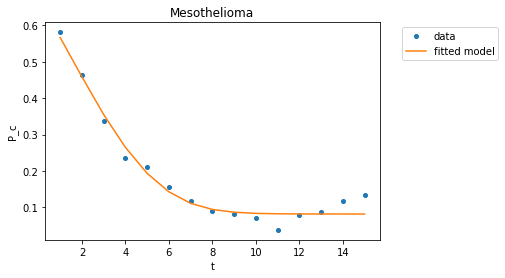

     cause_name         a         b         c
0  Mesothelioma  7.165318  0.434878 -2.414888


In [19]:
parameters = pd.DataFrame(columns = ['cause_name', 'a','b','c'])
for cancer in df.cause_name.unique():

        data = df[df['cause_name']==cancer]
    
        t=data['t']
        y=data['logit_P_c']
        res_lsq = least_squares(model, x_0, args=(t,y), loss='linear')        

        # PLOT
        output = function(res_lsq.x, t)
        plt.plot(t, scipy.expit(y), 'o', markersize=4, label='data')
        plt.plot(t, scipy.expit(output), label='fitted model')
        plt.xlabel("t")
        plt.ylabel("P_c")
        plt.legend(loc='lower right')
        plt.title(cancer)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
        # SAVE
        row = pd.DataFrame(data={'cause_name': [cancer],
              'a': [res_lsq.x[0]],
              'b': [res_lsq.x[1]],
              'c': [res_lsq.x[2]]})
        print(row)
        parameters = parameters.append(row, ignore_index = True)

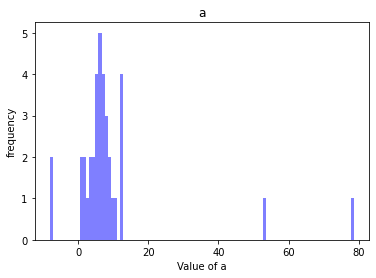

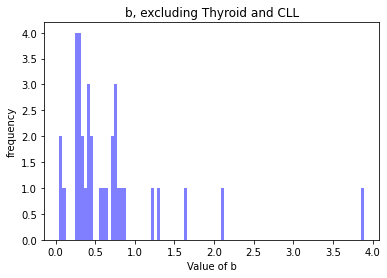

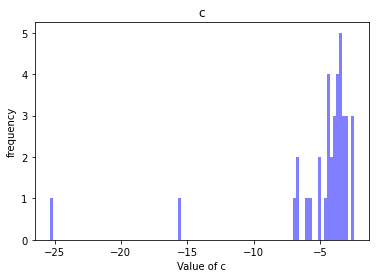

In [18]:
# Plotting the parameter distributions
n, bins, patches = plt.hist(parameters['a'], 100, facecolor='blue', alpha=0.5)
plt.title('a')
plt.ylabel('frequency')
plt.xlabel('Value of a')
plt.show()

n, bins, patches = plt.hist(parameters[parameters['b']<10]['b'], 100, facecolor='blue', alpha=0.5)
plt.title('b, excluding Thyroid and CLL')
plt.ylabel('frequency')
plt.xlabel('Value of b')
plt.show()
    
n, bins, patches = plt.hist(parameters['c'], 100, facecolor='blue', alpha=0.5)
plt.title('c')
plt.ylabel('frequency')
plt.xlabel('Value of c')
plt.show()

In [ ]:
parameters.to_csv('/homes/fed1/Survival_Franny/three_parameter_log_form_values_SEER_6_3_2021.csv', index=False)

## To do:

Try age group specific